In [33]:
# Hello! Welcome to the computer vision LAB. 
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html#drawing-functions

Hello


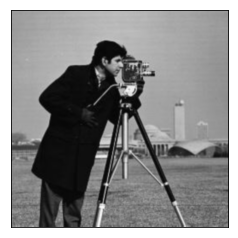

In [11]:
# Load an image
img_gray = cv2.imread('img/cameraman.jpg',0) # grayscale
img_color = cv2.imread('img/cameraman.jpg',-1) # color, no transparency
img_orig = cv2.imread('img/cameraman.jpg',1) # color orig

# Show Image

cv2.imshow('image',img_gray)
cv2.imshow('image2',img_color)
cv2.imshow('image3',img_orig)
cv2.waitKey(1000)
cv2.destroyAllWindows()

# Write an Image

cv2.imwrite('image3.jpg',img_orig)

# Plot with Matplotlib
plt.imshow(img_orig, cmap = 'gray', interpolation = 'bicubic', ,vmin=0.0, vmax=1.0))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


In [ ]:
# THRESHOLDING AGAIN
# Finding automatically the best threshold considering a bimodial image (histogram has two peaks)
# FLAG THRESH OTSU
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

In [ ]:
# CONTOURS
#https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html
cv2.drawContours(img, contours, -1, (0,255,0), 3)
# img, contours, idx of countour, col


# WaterSheds
#https://docs.opencv.org/3.3.1/d3/db4/tutorial_py_watershed.html
# Idea: Fill up the Valleys until the would mix and then create there the boundaries...fill up more etc.
# Marker areas we don't know as 0, background for sure as an integer and foreground for sure as other integer,
# than apply watershed, see also Problem 4 Final exercise

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

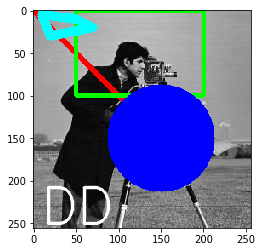

In [25]:
# Drawing Stuff
img_orig = cv2.imread('img/cameraman.jpg',1) # color orig

img = img_orig

# Draw a diagonal blue line with thickness of 5 px
# start, end, rgb, line-thickness
img_line = cv2.line(img_orig,(0,0),(120,120),(255,0,0),5)
img_rec = cv2.rectangle(img,(50,0),(200,100),(0,255,0),3)
img_circle = cv2.circle(img,(150,150), 63, (0,0,255), -1)
img_ellipse = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

# Drawing Polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img_pol = cv2.polylines(img,[pts],True,(0,255,255), 10)

# Writing Text

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'DD',(10,250), font, 2,(255,255,255),2,cv2.LINE_AA)


plt.imshow(img_line)
plt.imshow(img_rec)
plt.imshow(img_circle)
plt.imshow(img_ellipse)
plt.imshow(img_pol)

plt.show()

[128 112 106]
112
(584, 1040, 3)
1822080
uint8


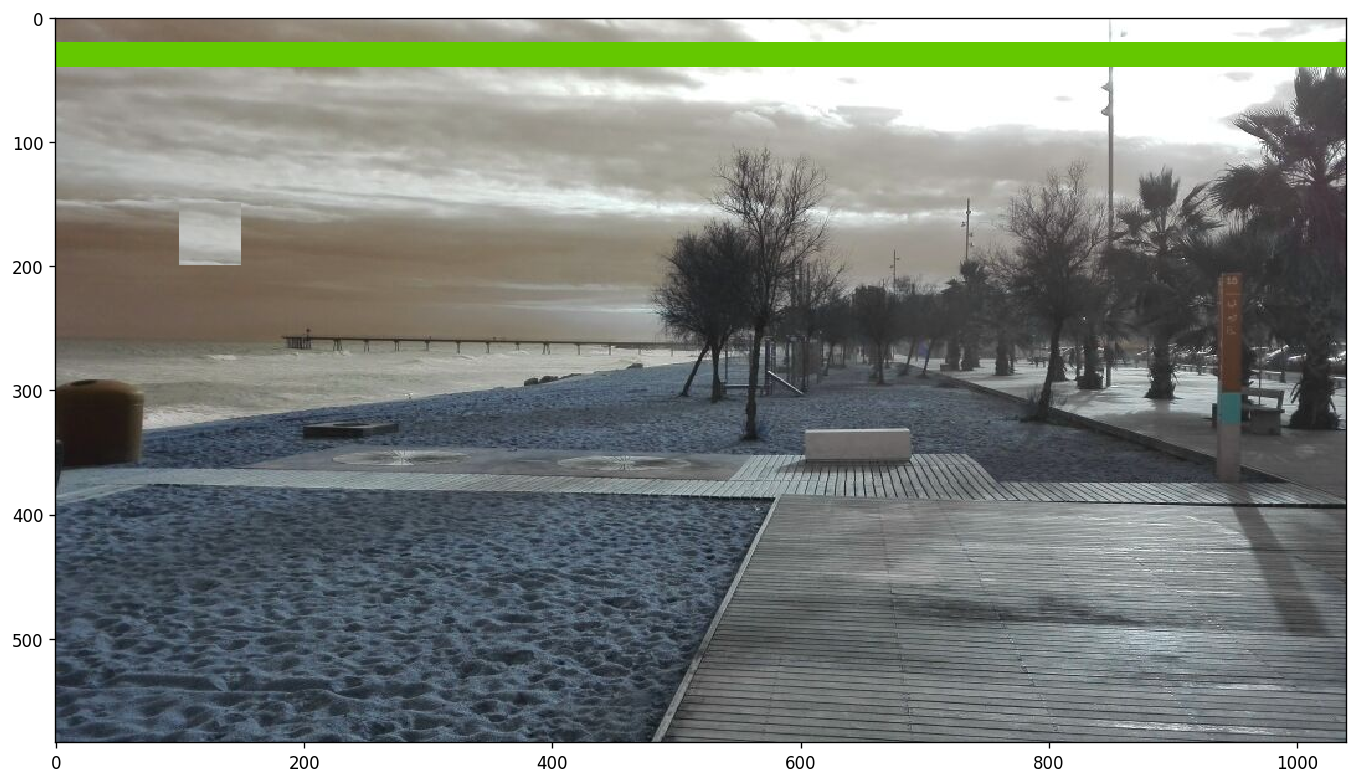

In [31]:
# Basic Operartions

img_orig = cv2.imread('img/B1.jpeg') # color orig
img = img_orig

print img[0,0] # print pixel
print img[0,0,1]# print green
print img.shape 
print img.size
print img.dtype

# Copying ROI:

cloud = img[100:150, 100:150]
img[150:200, 100:150] = cloud

img[20:40] = [100,200,0]

plt.figure(1, figsize=(16,8), dpi=120)
plt.imshow(img)
plt.show()

185 450


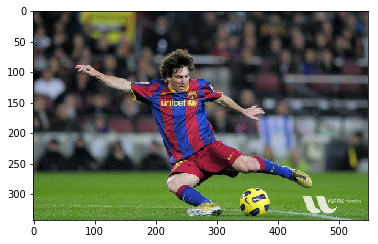

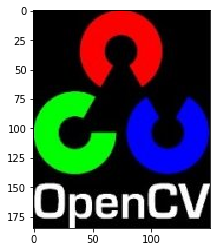

In [65]:
### MIX 2 IMAGES ###

# Load two images
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('blending.jpg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
cols1 = 150
cols2 = 300
colrange =  cols2-cols1
img2 = img2[0:rows, cols1:cols2]
print rows, cols

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

(185, 150)
(185, 150, 3)


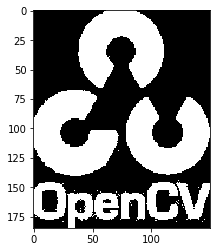

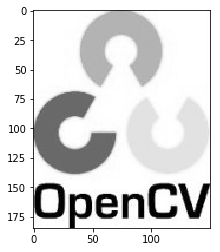

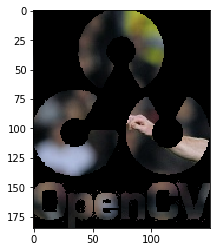

255


In [64]:
roi = img1[0:rows, 0:colrange]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(img2gray)

print mask_inv.shape
print roi.shape

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

#cv2.imshow('Le Mask',mask)
#cv2.waitKey(5000)
#cv2.destroyAllWindows()

plt.imshow(mask, cmap='gray')
plt.show()
plt.imshow(mask_inv, cmap='gray')
plt.show()
plt.imshow(cv2.cvtColor(img1_bg, cv2.COLOR_BGR2RGB))
plt.show()
print mask[0,0]

In [ ]:


# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()